###Carregamento da base de dados

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/tmoura/machinelearning/master/transfusion.data"

df=pd.read_csv(url, header=None)
df

,0,1,2,3,4
0,1,2,50,12500,98
1,1,0,13,3250,28
2,1,1,16,4000,35
3,1,2,20,5000,45
4,2,1,24,6000,77
...,...,...,...,...,...
743,2,23,2,500,38
744,2,21,2,500,52
745,2,23,3,750,62
746,2,39,1,250,39


###Normalização dos atributos

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df[1]=MinMaxScaler().fit_transform(np.array(df[1]).reshape(-1,1))
df[2]=MinMaxScaler().fit_transform(np.array(df[2]).reshape(-1,1))
df[3]=MinMaxScaler().fit_transform(np.array(df[3]).reshape(-1,1))
df[4]=MinMaxScaler().fit_transform(np.array(df[4]).reshape(-1,1))

df

,0,1,2,3,4
0,1,0.027027,1.000000,1.000000,1.000000
1,1,0.000000,0.244898,0.244898,0.270833
2,1,0.013514,0.306122,0.306122,0.343750
3,1,0.027027,0.387755,0.387755,0.447917
4,2,0.013514,0.469388,0.469388,0.781250
...,...,...,...,...,...
743,2,0.310811,0.020408,0.020408,0.375000
744,2,0.283784,0.020408,0.020408,0.520833
745,2,0.310811,0.040816,0.040816,0.625000
746,2,0.527027,0.000000,0.000000,0.385417


###Separação dos dados de teste

In [ ]:
from sklearn.model_selection import train_test_split

y=df[0]
#X=df.drop(0, axis=1)
X=df.loc[:,1:4]

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.2, random_state=None, stratify=y)

###Treinamento dos modelos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

modelos=[]
modelos.append(DecisionTreeClassifier(criterion='entropy', max_depth=4))
modelos.append(DecisionTreeClassifier(max_depth=8))
modelos.append(KNeighborsClassifier(n_neighbors=8, metric='euclidean', algorithm='brute'))
modelos.append(KNeighborsClassifier(n_neighbors=30, metric='euclidean', algorithm='brute'))


for modelo in modelos:
  modelo.fit(X_treino, y_treino)

###Predições e Resultados

In [ ]:
from sklearn import metrics

for i in range(len(modelos)):
  resultado=modelos[i].predict(X_teste)
  acertos=metrics.accuracy_score(resultado, y_teste)
  print("{}%".format(round(acertos*100))+" modelo "+str(i+1))


71% modelo 1
73% modelo 2
75% modelo 3
76% modelo 4


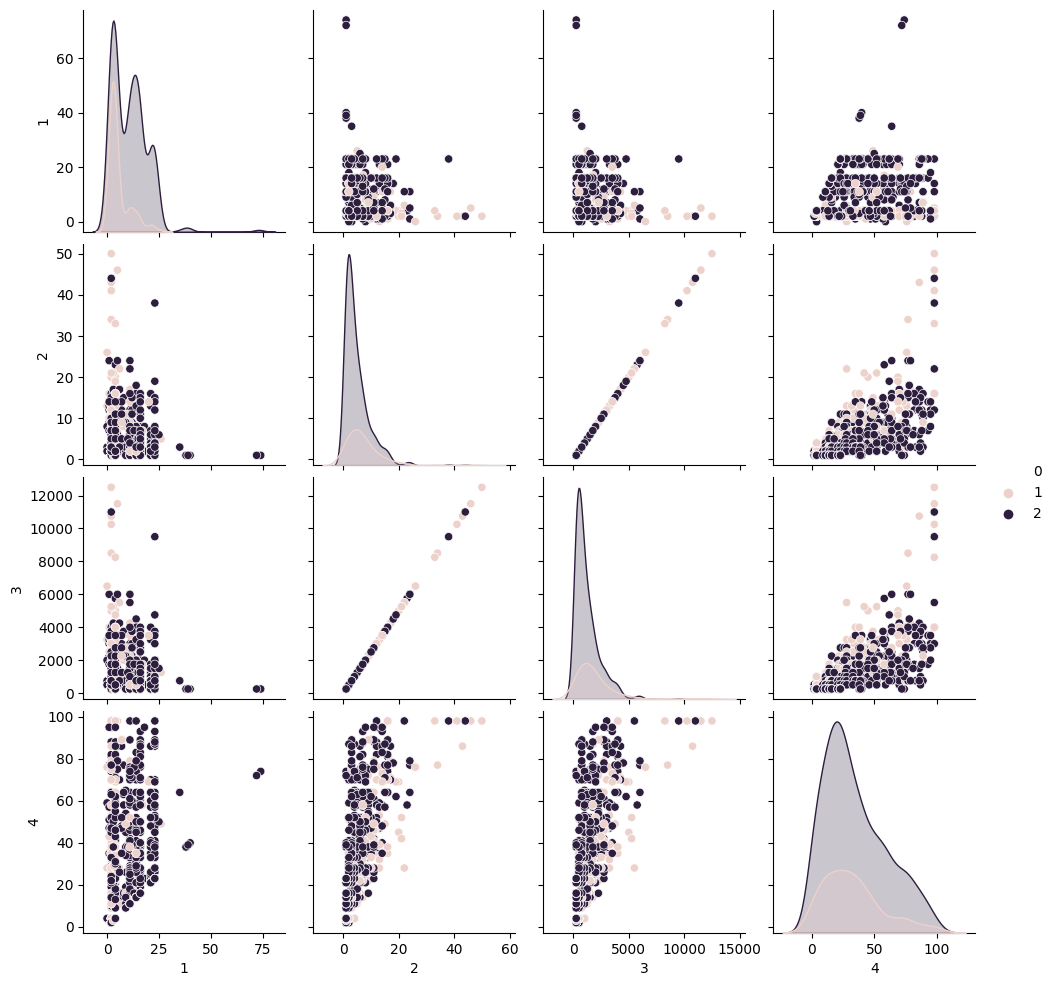

In [ ]:
import pandas as pd
import seaborn as sns # API de visualização

url="https://raw.githubusercontent.com/tmoura/machinelearning/master/transfusion.data"

df=pd.read_csv(url, header=None)

sns.pairplot(data=df, vars=(1,2,3,4), hue=0 )

#Tô achando os pontos muito sobrepostos, imagino que por isso os algoritmos tenham sofrido um pouco